**Created by Berkay Alan**

** **

**3 of September, 2022**

**Remote Data Access**

**For more Tutorial**: https://www.kaggle.com/berkayalan

# Content

- Datareader

- Yahoo Finance

- Google

- World Bank

- Eurostat

# Resources

- [**Working with Time Series**](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html#:~:text=Pandas%20Time%20Series%20Data%20Structures&text=For%20time%20stamps%2C%20Pandas%20provides,associated%20Index%20structure%20is%20DatetimeIndex%20.)

- [**Remote Data Access with Datareader**](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-yahoo)

- [**Pandas Datareader using Python (Tutorial)**](https://thecleverprogrammer.com/2021/03/22/pandas-datareader-using-python-tutorial/)

- [**Stock Market Analysis with Pandas – DataReader and Plotly for Beginners**](https://www.analyticsvidhya.com/blog/2021/12/stock-market-analysis-with-pandas-datareader-and-plotly-for-beginners/)

# Installing Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
from datetime import datetime

from pandas_datareader import data, wb

from warnings import filterwarnings
filterwarnings('ignore')

In order to see all rows and columns, we will increase max display numbers of dataframe.

In [9]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

# Datareader

 Analysing the stock prices demands a dataset that is continuously updating. In such scenarios, pandas have a special library called **pandas-datareader** and it is popularly used for working with realtime stock price datasets. 
 
  Pandas Datareader is a Python package that allows us to create a pandas DataFrame object by using various data sources from the internet. This package allows us to create a pandas DataFrame by using some popular data sources available on the internet. We will cover here the most used ones.

 If you haven't installed this library yet, you can install it as below:
 
     'pip install pandas-datareader' 

# Yahoo Finance

It provides stock market data from Yahoo Finance.

 Yahoo API makes possible of these functions:
        
- yahoo : retrieve daily stock prices (high, open, close, volume and adjusted close)

- yahoo-actions : retrieve historical corporate actions (dividends and stock splits)

- yahoo-dividends : retrieve historical dividends

Let's get the stock data of General Electric Company (GE).

In [23]:
df = data.DataReader('GE', 'yahoo', start='2019-01-10', end='2022-09-01')

We should give the name of stock(GE), source(yahoo), start and end date  to the function.

In [24]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-10,68.846153,65.307693,65.384613,68.769234,14604395.0,67.792091
2019-01-11,68.846153,67.076920,68.230766,68.769234,10487009.0,67.792091
2019-01-14,69.230766,67.384613,67.769234,68.461540,10618153.0,67.488777
2019-01-15,68.692307,66.923080,68.538460,67.153847,12227566.0,66.199661
2019-01-16,69.230766,66.615387,67.000000,69.076920,10954541.0,68.095398


We can also see the cooperate actions of GE. If you want to check, you can find it [here](https://finance.yahoo.com/quote/GE/).

In [25]:
actions = data.DataReader('GE', 'yahoo-actions', start='2019-01-10', end= datetime.today())
actions.head()

,action,value
2022-06-27,DIVIDEND,0.08
2022-03-07,DIVIDEND,0.08
2021-12-20,DIVIDEND,0.08
2021-09-24,DIVIDEND,0.08
2021-08-02,SPLIT,8.0


Now let's see historical dividends.

In [26]:
dividends = data.DataReader('GE', 'yahoo-dividends', start='2019-01-10', end= datetime.today())

In [27]:
dividends.head()

,action,value
2022-06-27,DIVIDEND,0.08
2022-03-07,DIVIDEND,0.08
2021-12-20,DIVIDEND,0.08
2021-09-24,DIVIDEND,0.08
2021-06-25,DIVIDEND,0.08


This is that much easy!

At last, let's create a plot with stock data.

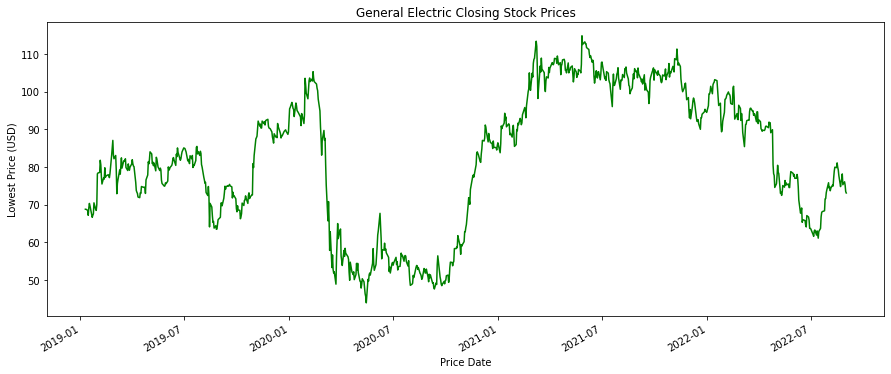

In [36]:
df['Close'].plot(figsize=(15,6), color = "g")

plt.title("General Electric Closing Stock Prices")
plt.xlabel("Price Date")
plt.ylabel("Lowest Price (USD)")
plt.show()

# OECD

 It's usage is as same as Yahoo. We only neet to specify dataset code. List of all OECD databases can be found [here](http://stats.oecd.org/).
 
 To confirm data set code, access to each data -> Export -> SDMX Query. Following example is to download ‘Strictness of employment protection – individual and collective dismissals (regular contracts’ data which set code is ‘EPL_OV’. [Here](https://stats.oecd.org/Index.aspx?DataSetCode=TUD) is the link of data

In [51]:
df = data.DataReader('EPL_OV', 'oecd')

In [52]:
df.T.head()

Time                             2018-01-01  2019-01-01
Country   Series                                       
Australia Version 1 (1985-2019)  1.666667    1.666667  
          Version 2 (1998-2019)  2.011905    2.011905  
          Version 3 (2008-2019)  1.940476    1.940476  
          Version 4 (2013-2019)  1.700078    1.700078  
Austria   Version 1 (1985-2019)  2.285714    2.285714

# World Bank

 We also can get data easily from the [World Bank’s World Development Indicators](https://data.worldbank.org/) by using the wb I/O functions.

Either from exploring the World Bank site, or using the search function included, every world bank indicator is accessible.

For example, if we wanted to compare the Gross Domestic Products per capita in constant dollars in USA, Germany and Türkiye, we would use the search function:

In [65]:
matches = wb.search('gdp.*capita.*const')

In [85]:
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'DEU', 'TR'], start=2017, end=2021)

In [86]:
dat

NY.GDP.PCAP.KD
country       year                
Germany       2021  42526.553689  
              2020  41315.313571  
              2019  43329.050689  
              2018  42973.289957  
              2017  42639.554409  
Turkiye       2021  13250.658911  
              2020  12038.628110  
              2019  11955.433464  
              2018  12006.815880  
              2017  11835.261106  
United States 2021  61280.389602  
              2020  58060.313948  
              2019  60687.232258  
              2018  59600.053098  
              2017  58215.411628

The resulting dataset is a properly formatted DataFrame with a hierarchical index.

All available country codes can be found with this code:

    'wb.country_codes'
    
Or from [here](https://wits.worldbank.org/wits/wits/witshelp/content/codes/country_codes.htm).

# Eurostat

 Eurostat is also easy. Now we will get Population connected to public water supply data.  The target URL is:

    https://ec.europa.eu/eurostat/databrowser/view/env_wat_pop/default/table?lang=en

We will specify dataset ID ‘env_ww_con’ to get corresponding data via DataReader.

In [54]:
df = data.DataReader('env_ww_con', 'eurostat')

In [59]:
df = df.T.reset_index()

In [60]:
df.head()

TIME_PERIOD,UNIT,WW_TP,GEO,FREQ,2018-01-01 00:00:00,2019-01-01 00:00:00,2020-01-01 00:00:00
0,Percentage,Independent wastewater treatment - total,Albania,Annual,NaN,NaN,NaN
1,Percentage,Independent wastewater treatment - total,Austria,Annual,4.05,4.05,3.96
2,Percentage,Independent wastewater treatment - total,Bosnia and Herzegovina,Annual,13.00,13.00,NaN
3,Percentage,Independent wastewater treatment - total,Belgium,Annual,12.73,12.81,14.23
4,Percentage,Independent wastewater treatment - total,Bulgaria,Annual,23.81,23.58,23.75


**Note:** Unit of measure is Percentage.

<div class="alert alert-block alert-success">
<b>Upcoming Tutorials</b>
    <li>Time Series Analysis with Statsmodels</li>
    <li>Forecasting and ARIMA models</li>
    <li>Forecasting and SARIMA models</li>
    <li>Facebook's Probhet</li>
    <li>Facebook's Kats</li>
    
</div>

Stay motivated!